<a href="https://colab.research.google.com/github/arshadzahangirchowdhury/EMD/blob/main/Detailedeigencalculations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

# Define the matrix (stress tensor) as input
sigma = np.array([[20, -25, 0],
[-25, 40, 0],
[0, 0, 0]])

# Calculate the eigenvalues and eigenvectors of the stress tensor
eigenvalues, eigenvectors = np.linalg.eig(sigma)

print('Eigenvalues')
print(eigenvalues)

print('Eigenvectors')
print(eigenvectors)



Eigenvalues
[ 3.07417596 56.92582404  0.        ]
Eigenvectors
[[-0.82806723  0.56062881  0.        ]
 [-0.56062881 -0.82806723  0.        ]
 [ 0.          0.          1.        ]]


In [4]:
import numpy as np

# Stress tensor
sigma = np.array(
[[-388, 0, 181],
[0, -388, 0],
[181, 0, -906]])

eigenvalues, eigenvectors = \
    np.linalg.eig(sigma)

print('Eigenvalues')
print(eigenvalues)

print('Eigenvectors')
print(eigenvectors)



Eigenvalues
[-331.02215268 -962.97784732 -388.        ]
Eigenvectors
[[ 0.95385474 -0.30026845  0.        ]
 [ 0.          0.          1.        ]
 [ 0.30026845  0.95385474  0.        ]]


In [1]:
import numpy as np
import matplotlib.pyplot as plt

def principal_stresses_and_directions(S: np.ndarray):
    S = np.asarray(S, dtype=float)
    if S.shape != (3, 3):
        raise ValueError("S must be a 3x3 array.")
    S_sym = 0.5 * (S + S.T)
    w, V = np.linalg.eigh(S_sym)
    idx = np.argsort(w)[::-1]
    sigmas = w[idx]
    V = V[:, idx]
    V = V / np.linalg.norm(V, axis=0, keepdims=True)
    return sigmas, V

def visualize_stress_tensor(S: np.ndarray, axis_len: float = 1.0):
    sigmas, V = principal_stresses_and_directions(S)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    origin = np.zeros((3,))
    for j, label in enumerate([r'$\sigma_1$', r'$\sigma_2$', r'$\sigma_3$']):
        vec = V[:, j] * axis_len
        ax.quiver(origin[0], origin[1], origin[2], vec[0], vec[1], vec[2], arrow_length_ratio=0.1)
        ax.text(vec[0], vec[1], vec[2], f"{label}={sigmas[j]:.3g}", fontsize=10)
    lim = axis_len * 1.2
    ax.set_xlim([-lim, lim]); ax.set_ylim([-lim, lim]); ax.set_zlim([-lim, lim])
    ax.set_xlabel('x'); ax.set_ylabel('y'); ax.set_zlabel('z')
    ax.set_title('Principal Directions of Stress Tensor')
    ax.view_init(elev=20, azim=35)
    plt.show()
    return sigmas, V


import numpy as np
import matplotlib.pyplot as plt

def principal_stresses_and_directions(S: np.ndarray):
    S = np.asarray(S, dtype=float)
    if S.shape != (3, 3):
        raise ValueError("S must be a 3x3 array.")
    S_sym = 0.5 * (S + S.T)
    w, V = np.linalg.eigh(S_sym)
    idx = np.argsort(w)[::-1]
    sigmas = w[idx]
    V = V[:, idx]
    V = V / np.linalg.norm(V, axis=0, keepdims=True)
    return sigmas, V

def visualize_stress_tensor(S: np.ndarray, axis_len: float = 1.0):
    sigmas, V = principal_stresses_and_directions(S)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    origin = np.zeros((3,))
    for j, label in enumerate([r'$\sigma_1$', r'$\sigma_2$', r'$\sigma_3$']):
        vec = V[:, j] * axis_len
        ax.quiver(origin[0], origin[1], origin[2], vec[0], vec[1], vec[2], arrow_length_ratio=0.1)
        ax.text(vec[0], vec[1], vec[2], f"{label}={sigmas[j]:.3g}", fontsize=10)
    lim = axis_len * 1.2
    ax.set_xlim([-lim, lim]); ax.set_ylim([-lim, lim]); ax.set_zlim([-lim, lim])
    ax.set_xlabel('x'); ax.set_ylabel('y'); ax.set_zlabel('z')
    ax.set_title('Principal Directions of Stress Tensor')
    ax.view_init(elev=20, azim=35)
    plt.show()
    return sigmas, V


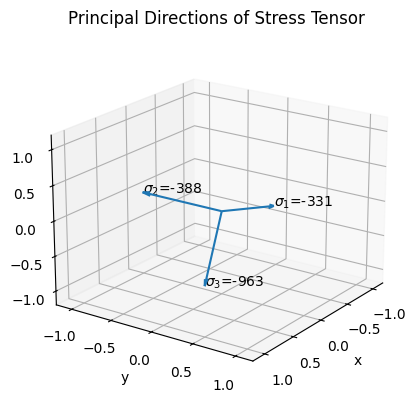

In [5]:
import numpy as np
# from stress_eigviz import visualize_stress_tensor

# S = np.array([[10, 3, 0],
#               [ 3, 5, 1],
#               [ 0, 1, 2]], dtype=float)

S = sigma

sigmas, V = visualize_stress_tensor(S, axis_len=1.0)
# sigmas -> [σ1, σ2, σ3] (descending)
# V[:,0], V[:,1], V[:,2] -> unit eigenvectors for σ1, σ2, σ3


In [10]:
import numpy as np
import plotly.graph_objects as go

def principal_stresses_and_directions(S: np.ndarray):
    """
    Compute principal stresses and normalized principal directions (eigenvectors).
    """
    S = np.asarray(S, dtype=float)
    if S.shape != (3, 3):
        raise ValueError("S must be a 3x3 array.")
    S_sym = 0.5 * (S + S.T)  # ensure symmetry
    w, V = np.linalg.eigh(S_sym)
    idx = np.argsort(w)[::-1]  # sort descending
    sigmas = w[idx]
    V = V[:, idx]
    V = V / np.linalg.norm(V, axis=0, keepdims=True)
    return sigmas, V

def visualize_stress_tensor_plotly(S: np.ndarray, axis_len: float = 1.0):
    """
    Visualize the principal directions (eigenvectors) of a 3x3 stress tensor in 3D using Plotly.
    """
    sigmas, V = principal_stresses_and_directions(S)
    origin = np.zeros((3,))

    fig = go.Figure()

    # Add eigenvector arrows
    for j, label in enumerate([r'σ₁', r'σ₂', r'σ₃']):
        vec = V[:, j] * axis_len
        fig.add_trace(go.Scatter3d(
            x=[origin[0], vec[0]],
            y=[origin[1], vec[1]],
            z=[origin[2], vec[2]],
            mode="lines+text",
            line=dict(width=6),
            text=[None, f"{label}={sigmas[j]:.3g}"],
            textposition="top center",
            name=label
        ))

    # Add coordinate axes
    axis_range = [-axis_len * 1.2, axis_len * 1.2]
    for axis, color in zip(np.eye(3), ["red", "green", "blue"]):
        fig.add_trace(go.Scatter3d(
            x=[0, axis[0]*axis_len],
            y=[0, axis[1]*axis_len],
            z=[0, axis[2]*axis_len],
            mode="lines",
            line=dict(color=color, width=2),
            showlegend=False
        ))

    fig.update_layout(
        scene=dict(
            xaxis=dict(range=axis_range, title="x"),
            yaxis=dict(range=axis_range, title="y"),
            zaxis=dict(range=axis_range, title="z"),
            aspectmode="cube"
        ),
        title="Principal Directions of Stress Tensor (Plotly)"
    )
    return fig, sigmas, V

# --- Demo with a sample stress tensor ---
S_demo = sigma

fig, sigmas, V = visualize_stress_tensor_plotly(S_demo, axis_len=1.0)
fig.show()

print("Principal stresses:", sigmas)
print("Eigenvectors (columns correspond to σ1, σ2, σ3):\n", V)


Principal stresses: [-331.02215268 -388.         -962.97784732]
Eigenvectors (columns correspond to σ1, σ2, σ3):
 [[-0.95385474  0.          0.30026845]
 [ 0.         -1.          0.        ]
 [-0.30026845  0.         -0.95385474]]


In [15]:
# @title Wireframe (hollow) unit cube with controllable rotations in 3D
# Colab-ready: Plotly + ipywidgets (optional sliders)

import numpy as np
import plotly.graph_objects as go
try:
    from ipywidgets import interact, FloatSlider
    HAS_WIDGETS = True
except Exception:
    HAS_WIDGETS = False

def rotation_matrix_xyz(rx_deg: float, ry_deg: float, rz_deg: float) -> np.ndarray:
    """
    Build a composite rotation matrix R = Rz * Ry * Rx for rotations (in degrees)
    about the x-, y-, and z-axes.

    Args:
        rx_deg: rotation about x-axis in degrees
        ry_deg: rotation about y-axis in degrees
        rz_deg: rotation about z-axis in degrees
    Returns:
        3x3 numpy array: composite rotation matrix
    """
    rx, ry, rz = np.deg2rad([rx_deg, ry_deg, rz_deg])

    Rx = np.array([[1, 0, 0],
                   [0, np.cos(rx), -np.sin(rx)],
                   [0, np.sin(rx),  np.cos(rx)]])
    Ry = np.array([[ np.cos(ry), 0, np.sin(ry)],
                   [0,           1,          0],
                   [-np.sin(ry), 0, np.cos(ry)]])
    Rz = np.array([[np.cos(rz), -np.sin(rz), 0],
                   [np.sin(rz),  np.cos(rz), 0],
                   [0,           0,          1]])

    # Note: column vectors convention; apply Rx first, then Ry, then Rz
    return Rz @ Ry @ Rx

def unit_cube_vertices() -> np.ndarray:
    """
    Returns the 8 vertices of a unit cube [0,1]^3 as an (8,3) array.
    Vertex order isn’t critical; edges list below connects them.
    """
    verts = np.array([[0,0,0],
                      [1,0,0],
                      [1,1,0],
                      [0,1,0],
                      [0,0,1],
                      [1,0,1],
                      [1,1,1],
                      [0,1,1]], dtype=float)
    return verts

# Edges as pairs of vertex indices (wireframe)
CUBE_EDGES = [
    (0,1), (1,2), (2,3), (3,0),       # bottom face
    (4,5), (5,6), (6,7), (7,4),       # top face
    (0,4), (1,5), (2,6), (3,7)        # verticals
]

def rotate_points_about_center(points: np.ndarray, R: np.ndarray) -> np.ndarray:
    """
    Rotate points of the cube about its geometric center (0.5, 0.5, 0.5).
    This keeps the cube centered while rotating.

    Args:
        points: (N,3) array of xyz points
        R:      (3,3) rotation matrix
    Returns:
        (N,3) rotated points
    """
    center = np.array([0.5, 0.5, 0.5])
    return (points - center) @ R.T + center

def build_wireframe_traces(verts: np.ndarray, edges=CUBE_EDGES) -> list:
    """
    Create Plotly line traces for each edge to produce a hollow cube.
    """
    traces = []
    for i, j in edges:
        xi, yi, zi = verts[i]
        xj, yj, zj = verts[j]
        traces.append(
            go.Scatter3d(
                x=[xi, xj], y=[yi, yj], z=[zi, zj],
                mode='lines',
                line=dict(width=5, color='black'),  # black lines
                showlegend=False
            )
        )
    return traces

def build_axes_traces(length=1.4):
    """
    Add 3D coordinate axes (X, Y, Z) centered at the origin with arrows.
    """
    # Axes lines
    axes = []
    # X-axis
    axes.append(go.Scatter3d(x=[0, length], y=[0, 0], z=[0, 0], mode='lines', line=dict(width=5), name='X'))
    # Y-axis
    axes.append(go.Scatter3d(x=[0, 0], y=[0, length], z=[0, 0], mode='lines', line=dict(width=5), name='Y'))
    # Z-axis
    axes.append(go.Scatter3d(x=[0, 0], y=[0, 0], z=[0, length], mode='lines', line=dict(width=5), name='Z'))

    # Arrowheads: tiny line segments at the ends
    ah = 0.05 * length
    axes += [
        # X arrowhead
        go.Scatter3d(x=[length, length-ah], y=[0,  ah], z=[0, 0], mode='lines', line=dict(width=5), showlegend=False),
        go.Scatter3d(x=[length, length-ah], y=[0, -ah], z=[0, 0], mode='lines', line=dict(width=5), showlegend=False),
        # Y arrowhead
        go.Scatter3d(x=[0,  ah], y=[length, length-ah], z=[0, 0], mode='lines', line=dict(width=5), showlegend=False),
        go.Scatter3d(x=[0, -ah], y=[length, length-ah], z=[0, 0], mode='lines', line=dict(width=5), showlegend=False),
        # Z arrowhead
        go.Scatter3d(x=[0, 0], y=[0,  ah], z=[length, length-ah], mode='lines', line=dict(width=5), showlegend=False),
        go.Scatter3d(x=[0, 0], y=[0, -ah], z=[length, length-ah], mode='lines', line=dict(width=5), showlegend=False),
    ]
    return axes

def plot_cube(rx=0.0, ry=0.0, rz=0.0, show_axes=True):
    """
    Plot a hollow (wireframe) unit cube rotated by (rx, ry, rz) degrees about
    the x-, y-, and z-axes, respectively.
    """
    verts = unit_cube_vertices()
    R = rotation_matrix_xyz(rx, ry, rz)
    verts_rot = rotate_points_about_center(verts, R)

    traces = build_wireframe_traces(verts_rot)
    if show_axes:
        traces += build_axes_traces(length=1.4)

    fig = go.Figure(data=traces)

    fig.update_scenes(
        xaxis=dict(range=[-0.2, 1.6], zeroline=True, showbackground=False),
        yaxis=dict(range=[-0.2, 1.6], zeroline=True, showbackground=False),
        zaxis=dict(range=[-0.2, 1.6], zeroline=True, showbackground=False),
        aspectmode='cube'
    )
    fig.update_layout(
        width=700, height=600,
        title=f"Hollow Unit Cube — Rotations: Rx={rx:.1f}°, Ry={ry:.1f}°, Rz={rz:.1f}°",
        scene=dict(
            xaxis_title="X",
            yaxis_title="Y",
            zaxis_title="Z",
            bgcolor="white"  # background of 3D scene = white
        ),
        margin=dict(l=0, r=0, t=50, b=0),
        paper_bgcolor="white"  # background outside scene
    )
    fig.show()

# ---- Example: one-shot static view (set your angles here) ----
plot_cube(rx=25, ry=15, rz=40)

# ---- OPTIONAL: interactive sliders (works in Colab) ----
if HAS_WIDGETS:
    interact(
        lambda rx, ry, rz: plot_cube(rx, ry, rz),
        rx=FloatSlider(min=-180, max=180, step=1, value=0, description='Rx (°)'),
        ry=FloatSlider(min=-180, max=180, step=1, value=-17.47, description='Ry (°)'),
        rz=FloatSlider(min=-180, max=180, step=1, value=0, description='Rz (°)')
    );
else:
    print("ipywidgets not available — sliders skipped. You can still call plot_cube(rx, ry, rz).")


interactive(children=(FloatSlider(value=0.0, description='Rx (°)', max=180.0, min=-180.0, step=1.0), FloatSlid…